<a href="https://colab.research.google.com/github/nafamubarokhusni/MALT1-Classification-Tugas-Besar-Bioinformatika/blob/main/CDD_ML_Part_2_MALT1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [8]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 58.9 MB/s eta 0:00:00


## **Load bioactivity data**

In [1]:
! wget https://raw.githubusercontent.com/nafamubarokhusni/MALT1-Classification-Tugas-Besar-Bioinformatika/main/MALT1_03_bioactivity_data_curated.csv

--2024-12-12 02:30:36--  https://raw.githubusercontent.com/nafamubarokhusni/MALT1-Classification-Tugas-Besar-Bioinformatika/main/MALT1_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30553 (30K) [text/plain]
Saving to: ‘MALT1_03_bioactivity_data_curated.csv’

MALT1_03_bioactivit 100%[===================>]  29.84K  --.-KB/s    in 0.01s   

2024-12-12 02:30:36 (2.15 MB/s) - ‘MALT1_03_bioactivity_data_curated.csv’ saved [30553/30553]



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/MALT1_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL3632807,CC1(C)CCC2=C(O1)c1ccc([N+](=O)[O-])cc1C(=O)C2=O,400.0,active
1,CHEMBL3632806,CC1(C)CCC2=C(O1)c1ccc(C#N)cc1C(=O)C2=O,1600.0,intermediate
2,CHEMBL3632805,CC1(C)CCC2=C(O1)c1ccc(Br)cc1C(=O)C2=O,9200.0,intermediate
3,CHEMBL3632804,CC1(C)CCC2=C(O1)c1ccc(F)cc1C(=O)C2=O,1500.0,intermediate
4,CHEMBL3183233,COCCOc1nc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(NC(=O)CCl...,3300.0,intermediate
...,...,...,...,...
369,CHEMBL5267101,N/C(=N\S(=O)(=O)c1ccncc1)NCc1cc(-c2ccc(Cl)cc2)...,562.0,active
370,CHEMBL5266044,N/C(=N\S(=O)(=O)c1cccs1)NCc1cc(-c2ccc(Cl)cc2)n...,249.0,active
371,CHEMBL5275402,Cn1ccc(S(=O)(=O)/N=C(\N)NCc2cc(-c3ccc(Cl)cc3)n...,510.0,active
372,CHEMBL5290312,N/C(=N\S(=O)(=O)c1cccc(F)c1)NCc1cc(-c2ccc(Cl)c...,56.0,active


In [4]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [5]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [6]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL3632807,400.0,active,CC1(C)CCC2=C(O1)c1ccc([N+](=O)[O-])cc1C(=O)C2=O
1,CHEMBL3632806,1600.0,intermediate,CC1(C)CCC2=C(O1)c1ccc(C#N)cc1C(=O)C2=O
2,CHEMBL3632805,9200.0,intermediate,CC1(C)CCC2=C(O1)c1ccc(Br)cc1C(=O)C2=O
3,CHEMBL3632804,1500.0,intermediate,CC1(C)CCC2=C(O1)c1ccc(F)cc1C(=O)C2=O
4,CHEMBL3183233,3300.0,intermediate,COCCOc1nc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(NC(=O)CCl...
...,...,...,...,...
369,CHEMBL5267101,562.0,active,N/C(=N\S(=O)(=O)c1ccncc1)NCc1cc(-c2ccc(Cl)cc2)...
370,CHEMBL5266044,249.0,active,N/C(=N\S(=O)(=O)c1cccs1)NCc1cc(-c2ccc(Cl)cc2)n...
371,CHEMBL5275402,510.0,active,Cn1ccc(S(=O)(=O)/N=C(\N)NCc2cc(-c3ccc(Cl)cc3)n...
372,CHEMBL5290312,56.0,active,N/C(=N\S(=O)(=O)c1cccc(F)c1)NCc1cc(-c2ccc(Cl)c...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [10]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [11]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,287.271,2.66030,0.0,5.0
1,267.284,2.62378,0.0,4.0
2,321.170,3.51460,0.0,3.0
3,260.264,2.89120,0.0,3.0
4,455.729,4.44360,1.0,6.0
...,...,...,...,...
369,501.399,4.03430,2.0,5.0
370,506.440,4.70080,2.0,5.0
371,504.403,3.37280,2.0,6.0
372,518.401,4.77840,2.0,4.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [12]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,287.271,2.66030,0.0,5.0
1,267.284,2.62378,0.0,4.0
2,321.170,3.51460,0.0,3.0
3,260.264,2.89120,0.0,3.0
4,455.729,4.44360,1.0,6.0
...,...,...,...,...
369,501.399,4.03430,2.0,5.0
370,506.440,4.70080,2.0,5.0
371,504.403,3.37280,2.0,6.0
372,518.401,4.77840,2.0,4.0


In [13]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL3632807,CC1(C)CCC2=C(O1)c1ccc([N+](=O)[O-])cc1C(=O)C2=O,400.0,active
1,CHEMBL3632806,CC1(C)CCC2=C(O1)c1ccc(C#N)cc1C(=O)C2=O,1600.0,intermediate
2,CHEMBL3632805,CC1(C)CCC2=C(O1)c1ccc(Br)cc1C(=O)C2=O,9200.0,intermediate
3,CHEMBL3632804,CC1(C)CCC2=C(O1)c1ccc(F)cc1C(=O)C2=O,1500.0,intermediate
4,CHEMBL3183233,COCCOc1nc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(NC(=O)CCl...,3300.0,intermediate
...,...,...,...,...
369,CHEMBL5267101,N/C(=N\S(=O)(=O)c1ccncc1)NCc1cc(-c2ccc(Cl)cc2)...,562.0,active
370,CHEMBL5266044,N/C(=N\S(=O)(=O)c1cccs1)NCc1cc(-c2ccc(Cl)cc2)n...,249.0,active
371,CHEMBL5275402,Cn1ccc(S(=O)(=O)/N=C(\N)NCc2cc(-c3ccc(Cl)cc3)n...,510.0,active
372,CHEMBL5290312,N/C(=N\S(=O)(=O)c1cccc(F)c1)NCc1cc(-c2ccc(Cl)c...,56.0,active


Now, let's combine the 2 DataFrame

In [14]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [15]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3632807,CC1(C)CCC2=C(O1)c1ccc([N+](=O)[O-])cc1C(=O)C2=O,400.0,active,287.271,2.66030,0.0,5.0
1,CHEMBL3632806,CC1(C)CCC2=C(O1)c1ccc(C#N)cc1C(=O)C2=O,1600.0,intermediate,267.284,2.62378,0.0,4.0
2,CHEMBL3632805,CC1(C)CCC2=C(O1)c1ccc(Br)cc1C(=O)C2=O,9200.0,intermediate,321.170,3.51460,0.0,3.0
3,CHEMBL3632804,CC1(C)CCC2=C(O1)c1ccc(F)cc1C(=O)C2=O,1500.0,intermediate,260.264,2.89120,0.0,3.0
4,CHEMBL3183233,COCCOc1nc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(NC(=O)CCl...,3300.0,intermediate,455.729,4.44360,1.0,6.0
...,...,...,...,...,...,...,...,...
369,CHEMBL5267101,N/C(=N\S(=O)(=O)c1ccncc1)NCc1cc(-c2ccc(Cl)cc2)...,562.0,active,501.399,4.03430,2.0,5.0
370,CHEMBL5266044,N/C(=N\S(=O)(=O)c1cccs1)NCc1cc(-c2ccc(Cl)cc2)n...,249.0,active,506.440,4.70080,2.0,5.0
371,CHEMBL5275402,Cn1ccc(S(=O)(=O)/N=C(\N)NCc2cc(-c3ccc(Cl)cc3)n...,510.0,active,504.403,3.37280,2.0,6.0
372,CHEMBL5290312,N/C(=N\S(=O)(=O)c1cccc(F)c1)NCc1cc(-c2ccc(Cl)c...,56.0,active,518.401,4.77840,2.0,4.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [26]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    # Changed the drop method call to the correct API format
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [17]:
df_combined.standard_value.describe()

,standard_value
count,374.000000
mean,11769.343794
std,25627.814292
min,0.023000
25%,240.000000
50%,2815.000000
75%,13302.500000
max,278000.000000


In [18]:
-np.log10( (10**-9)* 100000000 )

1.0

In [19]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [22]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1) # Changed to axis=1

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [23]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL3632807,CC1(C)CCC2=C(O1)c1ccc([N+](=O)[O-])cc1C(=O)C2=O,active,287.271,2.66030,0.0,5.0,400.0
1,CHEMBL3632806,CC1(C)CCC2=C(O1)c1ccc(C#N)cc1C(=O)C2=O,intermediate,267.284,2.62378,0.0,4.0,1600.0
2,CHEMBL3632805,CC1(C)CCC2=C(O1)c1ccc(Br)cc1C(=O)C2=O,intermediate,321.170,3.51460,0.0,3.0,9200.0
3,CHEMBL3632804,CC1(C)CCC2=C(O1)c1ccc(F)cc1C(=O)C2=O,intermediate,260.264,2.89120,0.0,3.0,1500.0
4,CHEMBL3183233,COCCOc1nc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(NC(=O)CCl...,intermediate,455.729,4.44360,1.0,6.0,3300.0
...,...,...,...,...,...,...,...,...
369,CHEMBL5267101,N/C(=N\S(=O)(=O)c1ccncc1)NCc1cc(-c2ccc(Cl)cc2)...,active,501.399,4.03430,2.0,5.0,562.0
370,CHEMBL5266044,N/C(=N\S(=O)(=O)c1cccs1)NCc1cc(-c2ccc(Cl)cc2)n...,active,506.440,4.70080,2.0,5.0,249.0
371,CHEMBL5275402,Cn1ccc(S(=O)(=O)/N=C(\N)NCc2cc(-c3ccc(Cl)cc3)n...,active,504.403,3.37280,2.0,6.0,510.0
372,CHEMBL5290312,N/C(=N\S(=O)(=O)c1cccc(F)c1)NCc1cc(-c2ccc(Cl)c...,active,518.401,4.77840,2.0,4.0,56.0


In [24]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,374.000000
mean,11769.343794
std,25627.814292
min,0.023000
25%,240.000000
50%,2815.000000
75%,13302.500000
max,278000.000000


In [27]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3632807,CC1(C)CCC2=C(O1)c1ccc([N+](=O)[O-])cc1C(=O)C2=O,active,287.271,2.66030,0.0,5.0,6.397940
1,CHEMBL3632806,CC1(C)CCC2=C(O1)c1ccc(C#N)cc1C(=O)C2=O,intermediate,267.284,2.62378,0.0,4.0,5.795880
2,CHEMBL3632805,CC1(C)CCC2=C(O1)c1ccc(Br)cc1C(=O)C2=O,intermediate,321.170,3.51460,0.0,3.0,5.036212
3,CHEMBL3632804,CC1(C)CCC2=C(O1)c1ccc(F)cc1C(=O)C2=O,intermediate,260.264,2.89120,0.0,3.0,5.823909
4,CHEMBL3183233,COCCOc1nc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(NC(=O)CCl...,intermediate,455.729,4.44360,1.0,6.0,5.481486
...,...,...,...,...,...,...,...,...
369,CHEMBL5267101,N/C(=N\S(=O)(=O)c1ccncc1)NCc1cc(-c2ccc(Cl)cc2)...,active,501.399,4.03430,2.0,5.0,6.250264
370,CHEMBL5266044,N/C(=N\S(=O)(=O)c1cccs1)NCc1cc(-c2ccc(Cl)cc2)n...,active,506.440,4.70080,2.0,5.0,6.603801
371,CHEMBL5275402,Cn1ccc(S(=O)(=O)/N=C(\N)NCc2cc(-c3ccc(Cl)cc3)n...,active,504.403,3.37280,2.0,6.0,6.292430
372,CHEMBL5290312,N/C(=N\S(=O)(=O)c1cccc(F)c1)NCc1cc(-c2ccc(Cl)c...,active,518.401,4.77840,2.0,4.0,7.251812


In [28]:
df_final.pIC50.describe()

,pIC50
count,374.000000
mean,5.840785
std,1.242706
min,3.555955
25%,4.876095
50%,5.551461
75%,6.619889
max,10.638272


Let's write this to CSV file.

In [30]:
df_final.to_csv('MALT1_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [31]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3632807,CC1(C)CCC2=C(O1)c1ccc([N+](=O)[O-])cc1C(=O)C2=O,active,287.271,2.6603,0.0,5.0,6.397940
6,CHEMBL3632803,COc1cc2c(cc1OC)C(=O)C1=C(CCC(C)(C)O1)C2=O,inactive,302.326,2.9259,0.0,5.0,5.000000
7,CHEMBL3632802,CC(C)=CCC1=C(O)C(=O)c2cc(Br)ccc2C1=O,inactive,321.170,3.9965,1.0,3.0,5.000000
8,CHEMBL3632801,CC(C)=CCC1=C(O)C(=O)c2cc(F)ccc2C1=O,inactive,260.264,3.3731,1.0,3.0,5.000000
14,CHEMBL1966084,O=C1C=C(NCCc2ccccc2)c2ccccc2C1=O,inactive,277.323,2.6252,1.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
369,CHEMBL5267101,N/C(=N\S(=O)(=O)c1ccncc1)NCc1cc(-c2ccc(Cl)cc2)...,active,501.399,4.0343,2.0,5.0,6.250264
370,CHEMBL5266044,N/C(=N\S(=O)(=O)c1cccs1)NCc1cc(-c2ccc(Cl)cc2)n...,active,506.440,4.7008,2.0,5.0,6.603801
371,CHEMBL5275402,Cn1ccc(S(=O)(=O)/N=C(\N)NCc2cc(-c3ccc(Cl)cc3)n...,active,504.403,3.3728,2.0,6.0,6.292430
372,CHEMBL5290312,N/C(=N\S(=O)(=O)c1cccc(F)c1)NCc1cc(-c2ccc(Cl)c...,active,518.401,4.7784,2.0,4.0,7.251812


Let's write this to CSV file.

In [32]:
df_2class.to_csv('MALT1_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [33]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

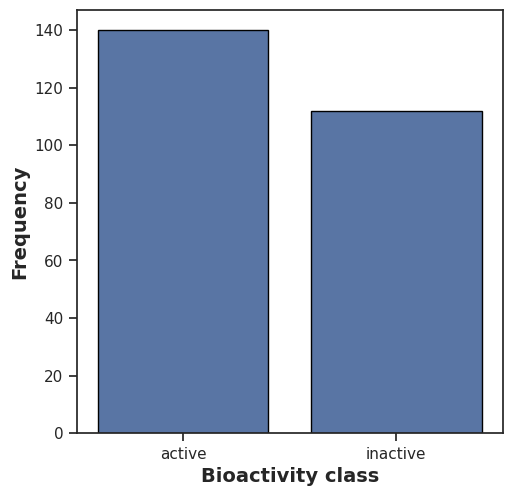

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

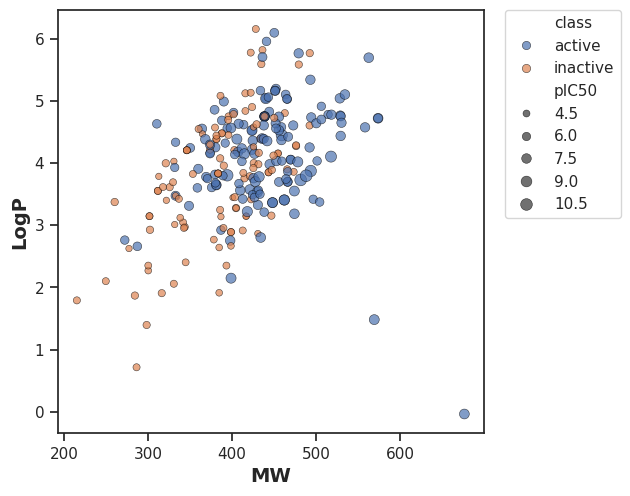

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

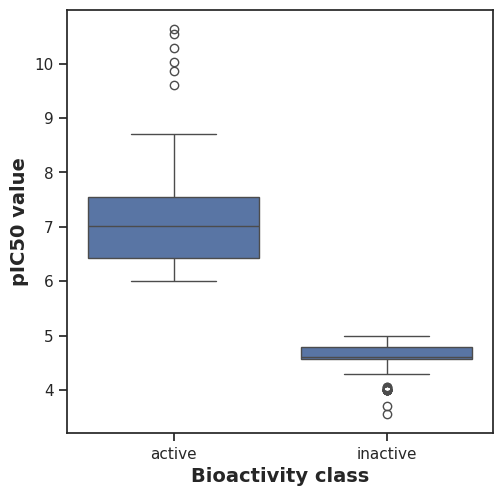

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [37]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [38]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,15680.0,2.141693e-42,0.05,Different distribution (reject H0)


#### **MW**

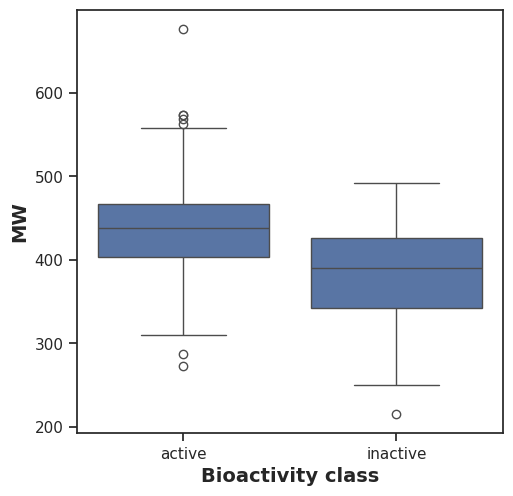

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [40]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,11726.5,1.391883e-11,0.05,Different distribution (reject H0)


#### **LogP**

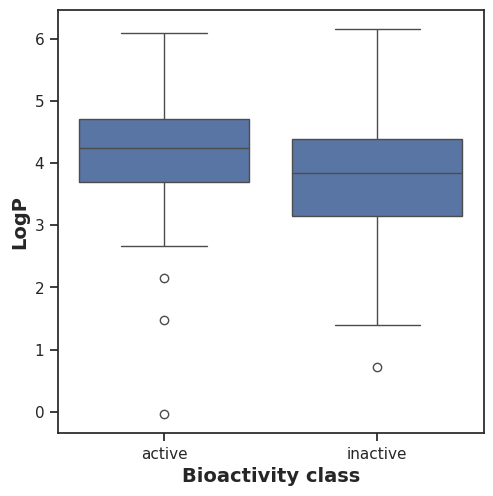

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [42]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,9942.0,0.000257,0.05,Different distribution (reject H0)


#### **NumHDonors**

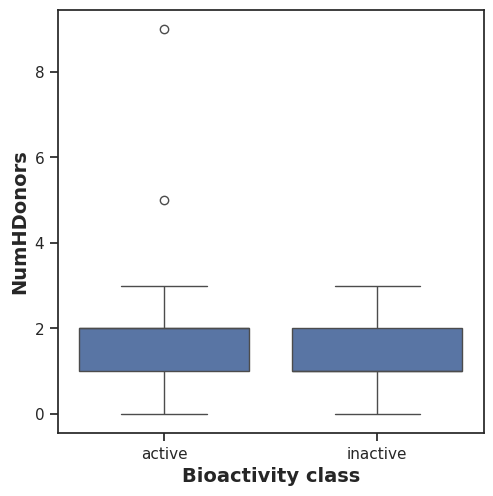

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [44]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,10248.0,0.000003,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

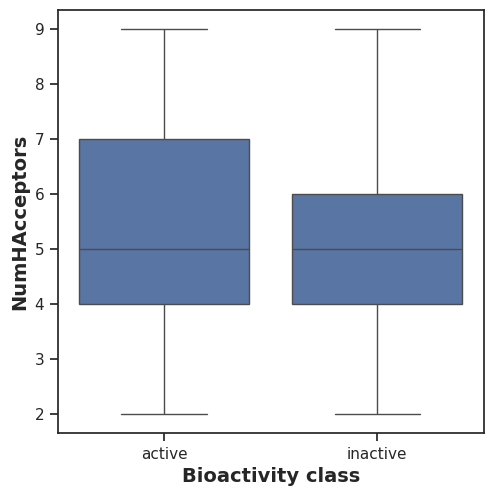

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [46]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,9048.5,0.033227,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [47]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: plot_MW.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: MALT1_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: MALT1_03_bioactivity_data_curated.csv (deflated 83%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_MW_vs_LogP.pdf (deflated 9%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: MALT1_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 37%)
